In [1]:
import pandas as pd
import faiss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#импортируем данные
base = pd.read_csv('F:\\Развитие\\DS\\Хакатоны\\Самокат (векторное расстояние) 05.23\\base.csv')
train = pd.read_csv('F:\\Развитие\\DS\\Хакатоны\\Самокат (векторное расстояние) 05.23\\train.csv')
test = pd.read_csv('F:\\Развитие\\DS\\Хакатоны\\Самокат (векторное расстояние) 05.23\\test.csv')

In [3]:
#Объединим даннные base и train для получения более точной и интересной БД
train['Id'] = train['Target']
train = train.drop('Target', axis = 1)
base = pd.concat([base, train])
base = base.reset_index(drop = True)

In [4]:
#Подготовим данные для faiss
model_columns = base.columns[1:]       
db = base[model_columns].values.astype('float32')
dt = test[model_columns].values.astype('float32')
d = len(model_columns)  

In [5]:
# #Подберем оптимальное количество кластеров с помощью "метода локтя"
distortion = []
K = range(1, 20)
for k in K:
    model = KMeans(n_clusters=k, n_init = 10, random_state=12345)
    model.fit(db)
    distortion.append(model.inertia_)

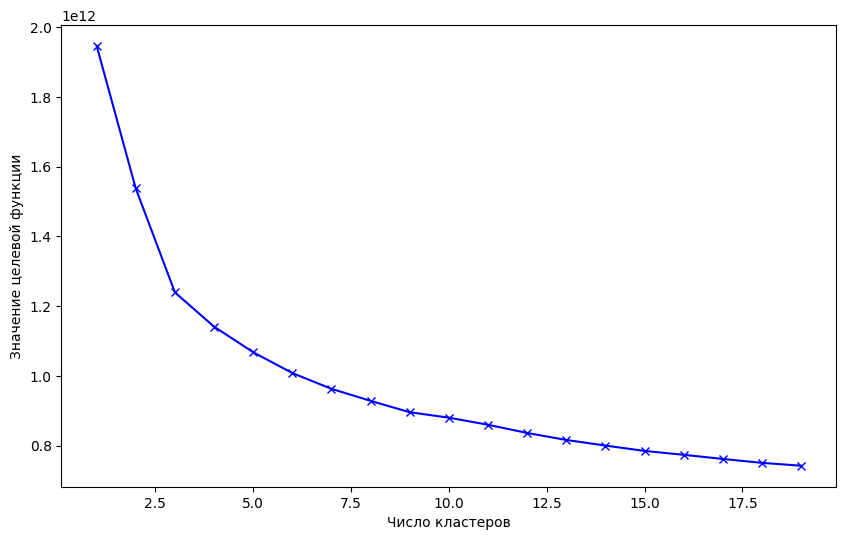

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(K, distortion, 'bx-')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show() 

In [7]:
#Создадим и обучим индекс faiss
k = 20

quantiser = faiss.IndexFlatL2(d) 
index = faiss.IndexIVFFlat(quantiser, d, k)

index.train(db)
index.add(db)

In [8]:
#Применим обученный индекс для обработки нашего test
topn = 10
index.nprobe = 5
D2, I2 = index.search(dt, topn) 
I_df_2 = pd.DataFrame(I2)
D_df_2 = pd.DataFrame(D2)

In [9]:
#Сохраним данные в файлик
id_base_dict = dict(base['Id'])

predicted_list = []
for candidates in I2:
    predicted_list.append(' '.join([id_base_dict[candidate] for candidate in candidates]))
    
answer = test[['Id']]
answer['Predicted'] = predicted_list

answer.to_csv('answer.csv', index=False)

C:\Users\Marusya\AppData\Local\Temp\ipykernel_4944\2627503209.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['Predicted'] = predicted_list
